In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
movies = pd.read_csv('./data/2/movies_cleaned.csv') 
recommendation = pd.read_csv('./data/2/recommendation_cleaned.csv') # uesr_id 개수
reviews = pd.read_csv('./data/2/reviews_cleaned.csv') # user_id 개수
search = pd.read_csv('./data/2/search_cleaned.csv') # user_id 개수
users = pd.read_csv('./data/2/users_cleaned.csv') # 메인
watch = pd.read_csv('./data/2/watch_cleaned.csv') # user_id 개수

## 컬럼 분류

In [3]:
# movies
movies_numeric = ['release_year', 'duration_minutes', 'imdb_rating']
movies_categorical = ['movie_id', 'title', 'content_type', 'genre_primary', 'rating', 'language', 'country_of_origin', 'added_to_platform']
movies_boolean = ['is_netflix_original', 'content_warning']

# recommendation
recommendation_numeric = ['position_in_list']
recommendation_categorical = ['recommendation_id', 'user_id', 'movie_id', 'recommendation_date', 'recommendation_type', 'device_type', 'time_of_day', 'algorithm_version']
recommendation_boolean = ['was_clicked']

# reviews
reviews_numeric = ['rating', 'helpful_votes', 'total_votes', 'sentiment_score']
reviews_categorical = ['review_id', 'user_id', 'movie_id', 'review_date', 'device_type', 'review_text', 'sentiment']
reviews_boolean = ['is_verified_watch']

# search
search_numeric = ['results_returned', 'search_duration_seconds']
search_categorical = ['search_id', 'user_id', 'search_query', 'search_date', 'device_type', 'location_country']
search_boolean = ['had_typo', 'used_filters']

# users
users_numeric = ['age', 'monthly_spend', 'household_size']
users_categorical = ['user_id', 'email', 'first_name', 'last_name', 'gender', 'country', 'state_province', 'city', 'subscription_plan', 'subscription_start_date', 'primary_device', 'created_at']
users_boolean = ['is_active']

# watch
watch_numeric = ['watch_duration_minutes', 'progress_percentage']
watch_categorical = ['session_id', 'user_id', 'movie_id', 'watch_date', 'device_type', 'action', 'quality', 'location_country']
watch_boolean = ['is_download']

## 1. 데이터 병합 및 전처리

In [4]:
# user와 watch 데이터 병합
user_watch = pd.merge(users, watch, on='user_id', how='inner')

# user_watch와 movies 데이터 병합
merged_df = pd.merge(user_watch, movies, on='movie_id', how='inner')

# 연령대 컬럼 추가
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대 이상']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

## 2. 연령대별 선호 장르 분석

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\3671264720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_genre = merged_df.groupby(['age_group', 'genre_primary'])['movie_id'].count().reset_index()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\3671264720.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_genre_pivot = age_genre.pivot_table(index='age_group', columns='genre_primary', values='movie_id', fill_value=0)


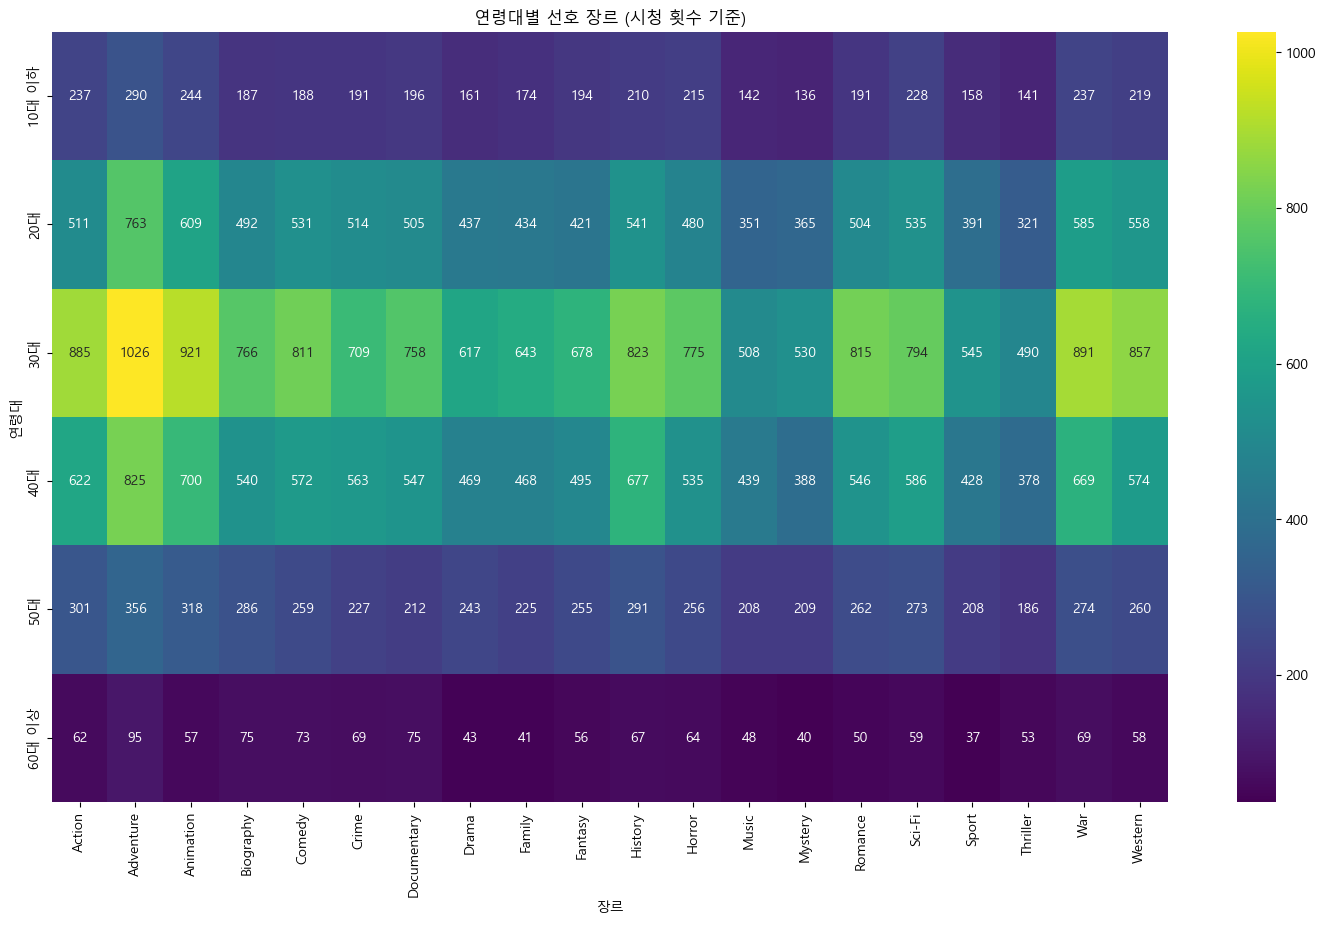

In [5]:
age_genre = merged_df.groupby(['age_group', 'genre_primary'])['movie_id'].count().reset_index()
age_genre_pivot = age_genre.pivot_table(index='age_group', columns='genre_primary', values='movie_id', fill_value=0)

plt.figure(figsize=(18, 10))
sns.heatmap(age_genre_pivot, cmap='viridis', annot=True, fmt='.0f')
plt.title('연령대별 선호 장르 (시청 횟수 기준)')
plt.xlabel('장르')
plt.ylabel('연령대')
plt.show()

## 3. 연령대별 월간 지출액 및 구독 요금제 분석

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1148916330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='monthly_spend', data=users, palette='pastel')


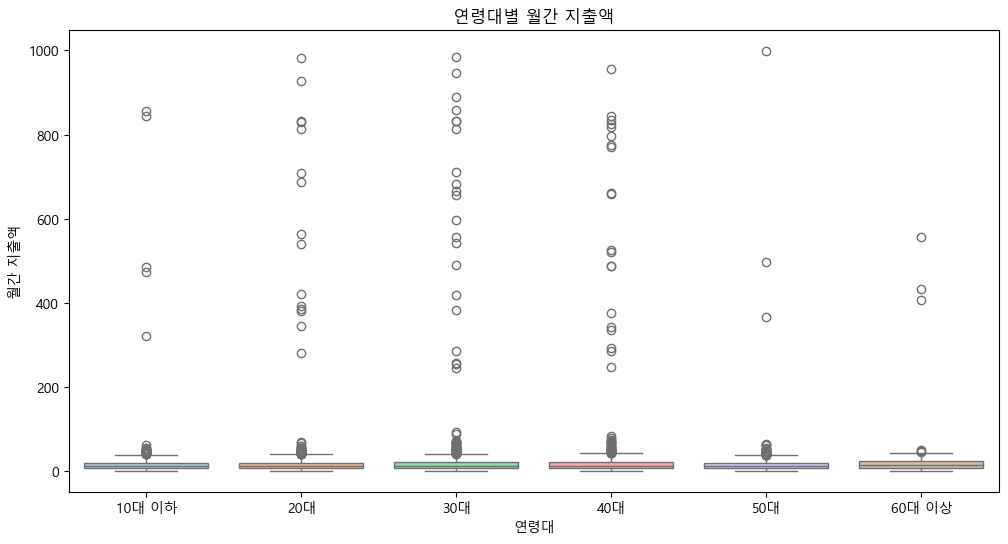

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='monthly_spend', data=users, palette='pastel')
plt.title('연령대별 월간 지출액')
plt.xlabel('연령대')
plt.ylabel('월간 지출액')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1927582577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subscription = users.groupby(['age_group', 'subscription_plan'])['user_id'].count().unstack().fillna(0)


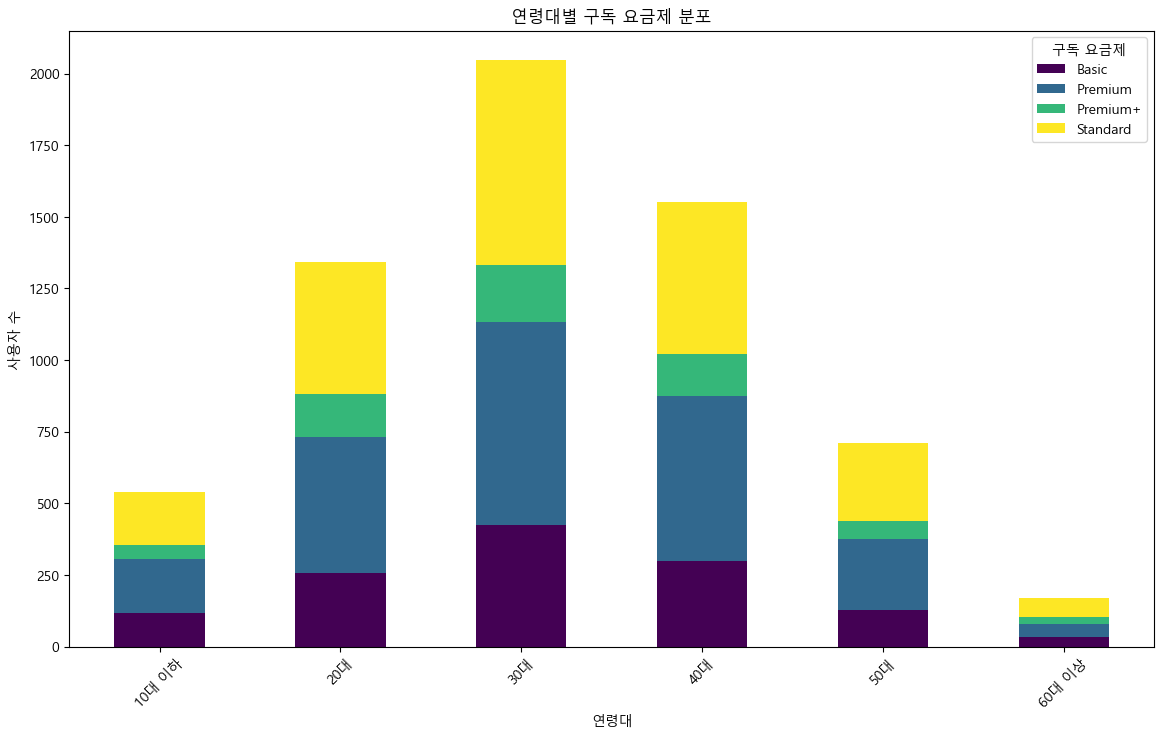

In [7]:
age_subscription = users.groupby(['age_group', 'subscription_plan'])['user_id'].count().unstack().fillna(0)

age_subscription.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('연령대별 구독 요금제 분포')
plt.xlabel('연령대')
plt.ylabel('사용자 수')
plt.xticks(rotation=45)
plt.legend(title='구독 요금제')
plt.show()

## 4. 연령대별 시청 행태 분석

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2986442292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='watch_duration_minutes', data=merged_df, palette='coolwarm', showfliers=False) # 이상치 제외


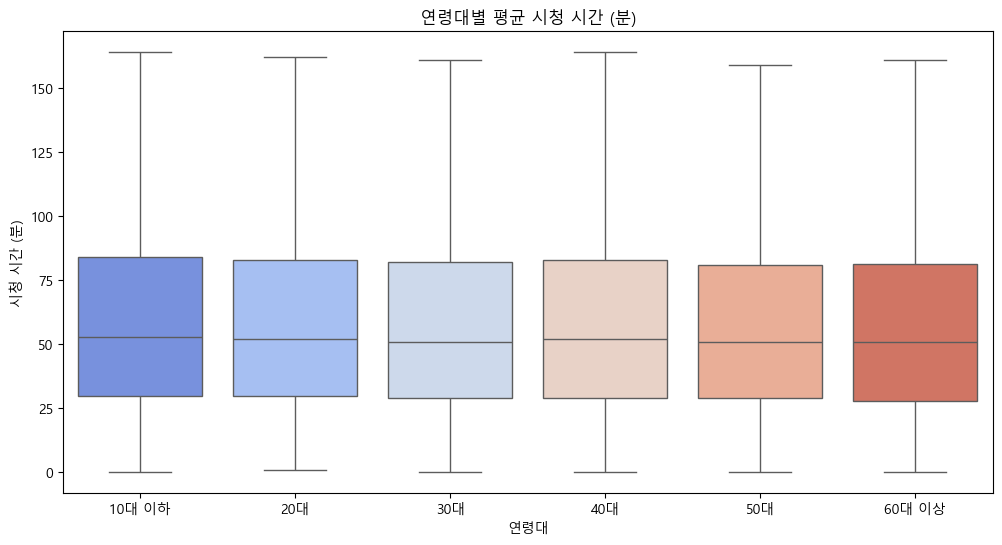

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='watch_duration_minutes', data=merged_df, palette='coolwarm', showfliers=False) # 이상치 제외
plt.title('연령대별 평균 시청 시간 (분)')
plt.xlabel('연령대')
plt.ylabel('시청 시간 (분)')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2666018185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='progress_percentage', data=merged_df, palette='magma', showfliers=False) # 이상치 제외


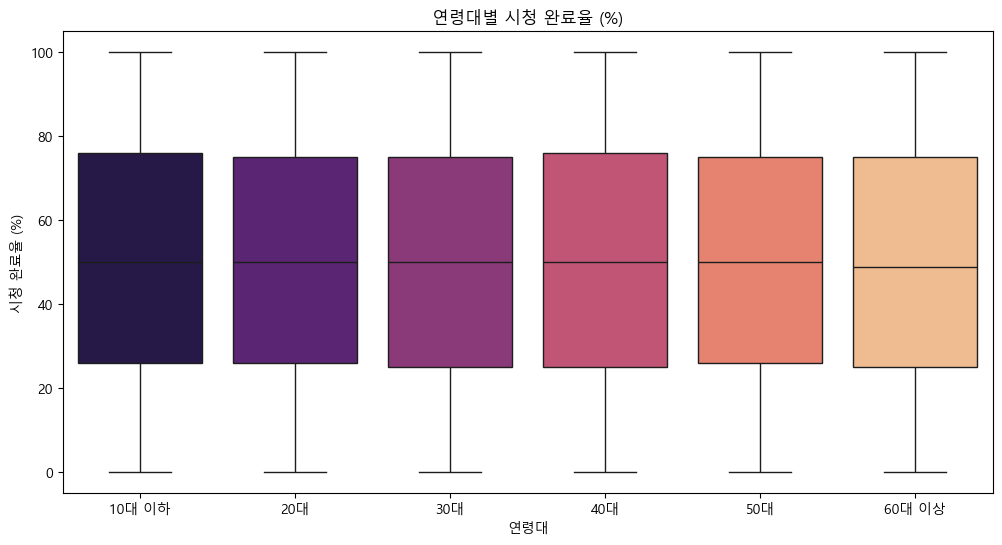

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='progress_percentage', data=merged_df, palette='magma', showfliers=False) # 이상치 제외
plt.title('연령대별 시청 완료율 (%)')
plt.xlabel('연령대')
plt.ylabel('시청 완료율 (%)')
plt.show()

## 5. 연령대별 주로 사용하는 기기 분석

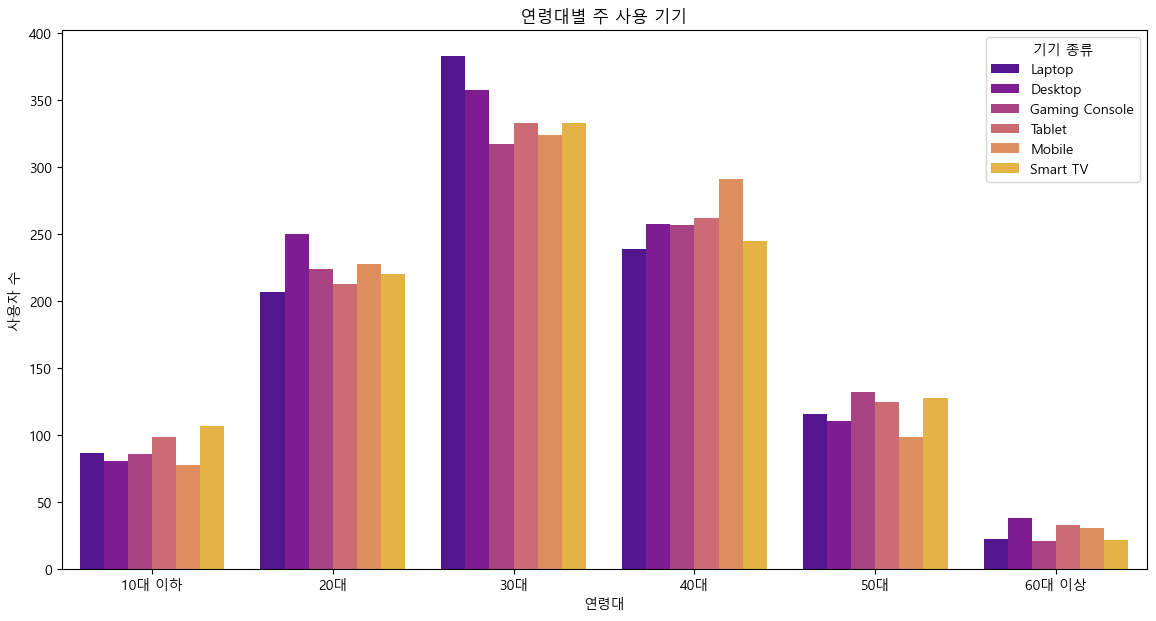

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(x='age_group', hue='primary_device', data=users, palette='plasma')
plt.title('연령대별 주 사용 기기')
plt.xlabel('연령대')
plt.ylabel('사용자 수')
plt.legend(title='기기 종류')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1756170954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_plan.index, y=churn_by_plan.values, palette='viridis')


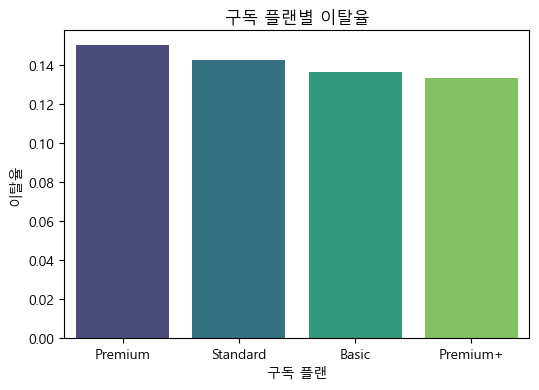

In [11]:
# --- 시각화 ---
plt.figure(figsize=(6, 4))
churn_by_plan = 1 - users.groupby('subscription_plan')['is_active'].mean().sort_values()
ax = sns.barplot(x=churn_by_plan.index, y=churn_by_plan.values, palette='viridis')
ax.set_title('구독 플랜별 이탈율')
ax.set_xlabel('구독 플랜')
ax.set_ylabel('이탈율')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\1866798078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_device.index, y=churn_by_device.values, palette='magma')


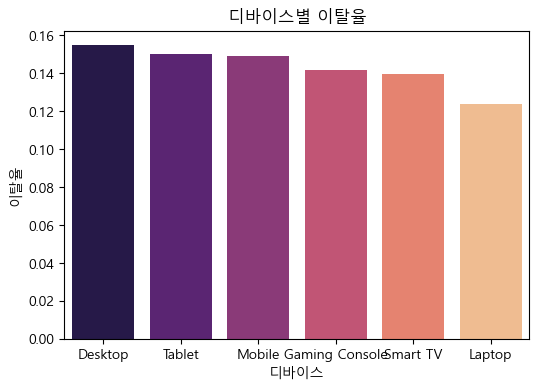

In [12]:
# --- 시각화 ---
plt.figure(figsize=(6, 4))
churn_by_device = 1 - users.groupby('primary_device')['is_active'].mean().sort_values()
ax = sns.barplot(x=churn_by_device.index, y=churn_by_device.values, palette='magma')
ax.set_title('디바이스별 이탈율')
ax.set_xlabel('디바이스')
ax.set_ylabel('이탈율')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17780\2014776272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_by_age.index, y=churn_by_age.values, palette='coolwarm')


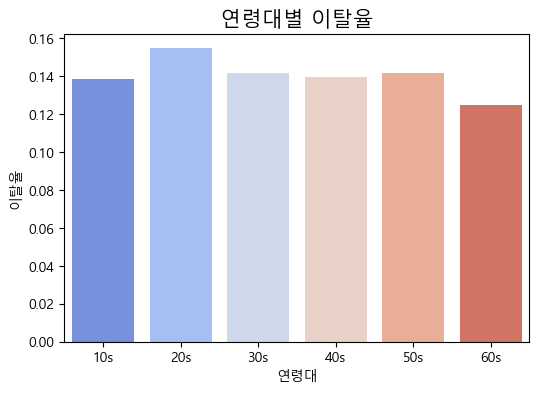

In [13]:
# --- 시각화 ---
# 나이를 10세 단위 그룹으로 변환
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10s', '20s', '30s', '40s', '50s', '60s']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6, 4))
# FutureWarning를 무시하고 계산
churn_by_age = 1 - users.groupby('age_group', observed=False)['is_active'].mean()
ax = sns.barplot(x=churn_by_age.index, y=churn_by_age.values, palette='coolwarm')
ax.set_title('연령대별 이탈율', fontsize=15)
ax.set_xlabel('연령대')
ax.set_ylabel('이탈율')
plt.show()

[LightGBM] [Info] Number of positive: 3817, number of negative: 3817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7557
[LightGBM] [Info] Number of data points in the train set: 7634, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.25      0.00      0.01       274
           1       0.86      1.00      0.92      1636

    accuracy                           0.86      1910
   macro avg       0.55      0.50      0.46      1910
weighted avg       0.77      0.86      0.79      1910



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


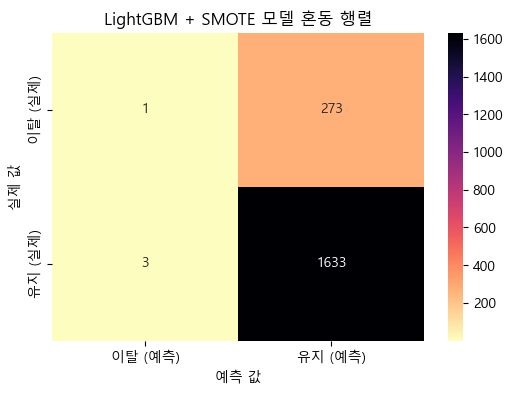


모델이 './model_output\activity_lgbm_smote_pipeline.pkl' 경로에 성공적으로 저장되었습니다.

--- 저장된 모델로 다시 예측한 결과 ---


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# imblearn 라이브러리 추가
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # sklearn의 Pipeline과 구분

# 모델
from lightgbm import LGBMClassifier

# 2. 특성 공학 (Feature Engineering)

# 사용자별 활동 횟수 계산
watch_counts = watch.groupby('user_id').size().reset_index(name='watch_count')
rec_counts = recommendation.groupby('user_id').size().reset_index(name='recommendation_count')
rev_counts = reviews.groupby('user_id').size().reset_index(name='review_count')
search_counts = search.groupby('user_id').size().reset_index(name='search_count')

# users 데이터프레임에 활동 횟수 데이터 병합 (left join)
merged_df = pd.merge(users, watch_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, rec_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, rev_counts, on='user_id', how='left')
merged_df = pd.merge(merged_df, search_counts, on='user_id', how='left')

# left join으로 생긴 NaN 값을 0으로 채움 (횟수가 없는 경우)
# TypeError 방지를 위해 숫자형 count 열들만 선택하여 채웁니다.
count_cols = ['watch_count', 'recommendation_count', 'review_count', 'search_count']
merged_df[count_cols] = merged_df[count_cols].fillna(0)


# 3. 모델 학습을 위한 데이터 준비

# 타겟(y)과 피처(X) 분리
y = merged_df['is_active'].astype(int)
X = merged_df.drop(['is_active', 'user_id', 'email', 'first_name', 'last_name', 'subscription_start_date', 'created_at'], axis=1)

# 학습 데이터와 테스트 데이터 분리 (stratify=y 옵션으로 타겟 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 4. 모델 파이프라인 구축

# 숫자형과 범주형 피처 자동 분류 (ValueError 방지)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# 데이터 전처리기 (스케일링 및 원-핫 인코딩)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# LightGBM 모델 정의 (class_weight='balanced'로 불균형 데이터 처리)
model = LGBMClassifier(random_state=42, class_weight='balanced')

# imblearn 파이프라인 구축 (전처리기 -> SMOTE -> 모델)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # 오버샘플링
    ('classifier', model)
])


# 5. 모델 학습 및 평가
pipeline.fit(X_train, y_train)

# 예측 및 평가
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma_r',
            xticklabels=['이탈 (예측)', '유지 (예측)'],
            yticklabels=['이탈 (실제)', '유지 (실제)'])
plt.title('LightGBM + SMOTE 모델 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()


# 6. 학습된 모델 저장
output_dir = './model_output'
os.makedirs(output_dir, exist_ok=True)

pipeline_path = os.path.join(output_dir, 'activity_lgbm_smote_pipeline.pkl')
with open(pipeline_path, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"\n모델이 '{pipeline_path}' 경로에 성공적으로 저장되었습니다.")


# 7. 저장된 모델 로드 후 예측
with open(pipeline_path, 'rb') as f:
    loaded_pipeline = pickle.load(f)

loaded_pred = loaded_pipeline.predict(X_test)
print("\n--- 저장된 모델로 다시 예측한 결과 ---")

In [ ]:
print(y_test)

3210    1
1621    1
5411    1
2514    1
6254    1
       ..
610     1
2432    1
4313    1
2036    1
683     1
Name: is_active, Length: 1910, dtype: int64


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- 1. 데이터 불러오기 ---
# 사용하신 .ipynb 파일 내 코드에 따르면, 'users_cleaned.csv' 파일이 사용자 정보를 담고 있습니다.
# 이 파일의 경로를 정확하게 지정해주셔야 합니다.
try:
    df = pd.read_csv('./data/2/users_cleaned.csv')
except FileNotFoundError:
    print("오류: 'users_cleaned.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    # 파일이 없을 경우를 대비해 예시 데이터프레임을 생성합니다.
    df = pd.DataFrame({'is_active': [True]*895 + [False]*105})

# --- 2. 데이터 준비 ---
# 'is_active' 값(True/False)에 따라 레이블을 '활성'/'비활성(이탈)'로 변경합니다.
df['status'] = df['is_active'].apply(lambda x: '활성' if x else '비활성(이탈)')

# 상태별 사용자 수를 계산합니다.
status_counts = df['status'].value_counts()
labels = status_counts.index
values = status_counts.values

# --- 3. 도넛 차트 생성 ---
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=.6,  # 도넛의 중간 구멍 크기 조절
    textinfo='label+percent',
    insidetextorientation='radial'
)])

# --- 4. 차트 레이아웃 설정 ---
fig.update_layout(
    title_text='💔 전체 사용자 활성/비활성 비율',
    title_x=0.5, # 제목 중앙 정렬
    legend_title_text='상태'
)

# --- 5. 차트 표시 ---
fig.show()
